In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

## PSV10 Data Sorted for Ages 0 to 5 Ma grouped into bins for every 10 degrees from -80 to 80
Directional Strengths as residuals from $I{gad}$

In [3]:
pd.set_option('display.max_rows', 10)               # set dataframe display
 
psv = pd.read_csv("..\..\data\PSV0.csv")            # import csv file as pandas dataframe (df)

psv.head()

,age,age_pm,age_high,age_low,site_lat,site_lon,model_lat,model_lon,nn,k,dec,inc,model_vgp_lat,model_vgp_lon,site_ID
0,-0.024000,0.276,999.000000,999.000000,-39.30000,175.60000,-39.291517,175.600832,5,382.8125,15.8,-50.6,74.9,238.7,2132
1,0.000000,999.000,999.000000,999.000000,-7.59000,110.42600,-7.590000,110.426000,7,462.5000,354.9,-33.4,78.2,314.9,512
2,0.000000,0.020,999.000000,999.000000,19.12350,97.53770,19.123500,97.537700,9,233.7000,9.6,27.8,79.8,211.5,1313
3,0.000000,0.050,999.000000,999.000000,4.93361,-75.46733,4.933610,284.532670,10,193.0000,6.0,7.0,83.9,27.7,1929
4,0.000063,999.000,0.000066,0.000059,19.48000,257.78000,19.480005,257.780005,6,238.0000,10.7,37.8,79.8,336.2,637


In [4]:
psv_5 = psv.loc[(psv.age <= 5.00) & (psv.model_vgp_lat >= 0)] # sort the date for age less than or equal to 5 MA and Model VGP lat > or = 0

psvnew = pd.DataFrame()                          # create empty dataframe

#rename using:
#psvnew.rename(columns={'model_lat': 'Model_lat', 'model_lon': 'Model_lon', 'age':'Age', 'age_pm':'Age_pm', 'age_high':'Age_high', 'age_low':'Age_low', 
 #                     'dec':'Dec', 'inc':'Inc', 'k':'K'}, inplace=True)

# adding columns from imported 'psv' df to new psvnew df and re-naming and rearranging them
psvnew['Model_lat'] = psv_5.model_lat              # latitude
psvnew['Model_lon'] = psv_5.model_lon              # longitude
psvnew['AGE'] = psv_5.age                          # estimated age
psvnew['AGE_pm'] = psv_5.age_pm                   
psvnew['AGE_high'] = psv_5.age_high
psvnew['AGE_low'] = psv_5.age_low
psvnew['Dec'] = psv_5.dec                          # declination
psvnew['Inc'] = psv_5.inc                          # inclination
psvnew['K'] = psv_5.k                              # precision parameter

psvnew.reset_index(inplace=True, drop=True) # reset index 

psvnew

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K
0,-39.291517,175.600832,-0.024000,0.276,999.000000,999.000000,15.8,-50.6,382.8125
1,-7.590000,110.426000,0.000000,999.000,999.000000,999.000000,354.9,-33.4,462.5000
2,19.123500,97.537700,0.000000,0.020,999.000000,999.000000,9.6,27.8,233.7000
3,4.933610,284.532670,0.000000,0.050,999.000000,999.000000,6.0,7.0,193.0000
4,19.480005,257.780005,0.000063,999.000,0.000066,0.000059,10.7,37.8,238.0000
...,...,...,...,...,...,...,...,...,...
1630,-7.143203,109.381397,4.650000,999.000,6.700000,2.590000,350.5,-28.1,443.7000
1631,-7.143203,109.381397,4.650000,999.000,6.700000,2.590000,0.8,-28.4,173.0000
1632,-7.078609,109.355374,4.650000,999.000,6.700000,2.590000,353.7,-4.4,228.0000
1633,-1.356744,35.852663,4.810000,0.260,999.000000,999.000000,357.2,27.9,195.0000


In [5]:
psvnewn = psvnew[:] #copy table to a new one as to not revert previous setting on table

In [6]:
psvnewn = psvnewn.sort_values(by='Model_lat') # sort by increasing Latitude values
psvnewn.reset_index(inplace=True)            # reset index column
psvnewn

,index,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K
0,369,-78.381465,164.181845,0.084,0.004,999.00,999.00,263.1,-85.9,188.0
1,468,-78.377810,164.229724,0.120,0.010,999.00,999.00,349.1,-83.0,149.2
2,467,-78.377808,164.189766,0.120,0.010,999.00,999.00,293.6,-84.0,273.0
3,588,-78.361547,164.106279,0.280,0.010,999.00,999.00,270.9,-78.1,114.5
4,512,-78.291753,164.738929,0.180,0.040,999.00,999.00,12.0,-78.7,395.5
...,...,...,...,...,...,...,...,...,...,...
1630,558,71.003126,351.491116,0.240,999.000,0.24,0.24,338.9,73.7,1096.0
1631,559,71.003128,351.510681,0.240,999.000,0.24,0.24,192.6,81.4,795.0
1632,807,78.681916,11.216281,0.500,999.000,1.00,0.00,355.5,54.3,1413.0
1633,805,78.860327,10.923642,0.500,999.000,1.00,0.00,53.5,82.4,1457.0


In [7]:
pd.set_option('display.max_rows', 10)

df = psvnewn.iloc[:]             # copy table to a new one as to not revert previous setting on table

# in a new column called bins, assign labels -8 to 8 to each data point corresponding to -80 to 80 degrees by 10 degree incriments
df['bins'] = pd.cut(x=df['Model_lat'], bins=[-80.0, -70.0, -60.0, -50.0, -40.0, -30.0, 
                                            -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 
                                            60.0, 70.0, 80.0], 
                   labels=[-8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8],
                   right=False)
del df['index']                  # delete extra index column
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins
0,-78.381465,164.181845,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,-8
1,-78.377810,164.229724,0.120,0.010,999.00,999.00,349.1,-83.0,149.2,-8
2,-78.377808,164.189766,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,-8
3,-78.361547,164.106279,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,-8
4,-78.291753,164.738929,0.180,0.040,999.00,999.00,12.0,-78.7,395.5,-8
...,...,...,...,...,...,...,...,...,...,...
1630,71.003126,351.491116,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,8
1631,71.003128,351.510681,0.240,999.000,0.24,0.24,192.6,81.4,795.0,8
1632,78.681916,11.216281,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,8
1633,78.860327,10.923642,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,8


In [8]:
bins = df['bins'].unique()

In [9]:
# empty array to be filled with bin dfs
bins_dfs = []

for binval in bins:
    bin_frame = df.loc[df.bins == binval]
    bins_dfs.append(bin_frame)
    
len(bins_dfs)
bins_dfs[0]

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8
...,...,...,...,...,...,...,...,...,...,...
71,-77.264226,165.171090,4.000,999.000,8.0,0.0,38.1,-66.6,315.1,-8
72,-77.257497,164.985125,4.000,999.000,8.0,0.0,5.0,-56.0,604.2,-8
73,-77.165814,164.882106,4.000,999.000,8.0,0.0,335.3,-78.6,184.5,-8
74,-77.165814,164.882106,4.000,999.000,8.0,0.0,327.1,-77.1,621.8,-8


In [10]:
# creates an array with each value representing the length of the group for that bins value
arr_0 = np.array([len(bins_dfs[0]), len(bins_dfs[1]), len(bins_dfs[2]), len(bins_dfs[3]), len(bins_dfs[4]), len(bins_dfs[5]), len(bins_dfs[6]), len(bins_dfs[7]),
      len(bins_dfs[8]), len(bins_dfs[9]), len(bins_dfs[10]), len(bins_dfs[11]), len(bins_dfs[12]), len(bins_dfs[13]), len(bins_dfs[14]), len(bins_dfs[15])])

print(arr_0, 'sum:', sum(arr_0))

[ 76  35  24  35  96  88  77 152  86 184 243 148 189 119  57  26] sum: 1635


In [11]:
df["$I{gad}$"] = np.degrees(np.arctan(2*np.tan(np.radians(df.Model_lat))))   # inputs latitude as radians into the tan function and outputs a value in degrees
df["Istdv_Fisher"] = 81/np.sqrt(np.abs(df["K"])) # inc stdv 

df["ΔI"] =  ((df["Inc"]) - df["$I{gad}$"])           # inclination anamoly in degrees
df["AGE_unc"] = df["AGE_high"] - df["AGE_low"]     # age uncertainty

In [12]:
latr = np.radians(df.Model_lat)                    # converts Lat and Long values from degrees into radians
longr = np.radians(df.Model_lon)

df['X']= np.cos(latr)*np.cos(longr)                # convert Lat and Long to cartesian X,Y,Z coordinates and creates X, Y, and Z columns 
df['Y']= np.cos(latr)*np.sin(longr)
df['Z']= np.sin(latr)
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,$I{gad}$,Istdv_Fisher,ΔI,AGE_unc,X,Y,Z
0,-78.381465,164.181845,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,-8,-84.130394,5.907532,-1.769606,0.0,-0.193768,0.054897,-0.979510
1,-78.377810,164.229724,0.120,0.010,999.00,999.00,349.1,-83.0,149.2,-8,-84.128509,6.631329,1.128509,0.0,-0.193874,0.054752,-0.979497
2,-78.377808,164.189766,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,-8,-84.128508,4.902343,0.128508,0.0,-0.193836,0.054887,-0.979497
3,-78.361547,164.106279,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,-8,-84.120122,7.569763,6.020122,0.0,-0.194023,0.055246,-0.979440
4,-78.291753,164.738929,0.180,0.040,999.00,999.00,12.0,-78.7,395.5,-8,-84.084119,4.072975,5.384119,0.0,-0.195772,0.053414,-0.979194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,71.003126,351.491116,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,8,80.233201,2.446694,-6.533201,0.0,0.321934,-0.048164,0.945536
1631,71.003128,351.510681,0.240,999.000,0.24,0.24,192.6,81.4,795.0,8,80.233202,2.872774,1.166798,0.0,0.321950,-0.048054,0.945536
1632,78.681916,11.216281,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,8,84.285210,2.154835,-29.985210,1.0,0.192507,0.038174,0.980553
1633,78.860327,10.923642,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,8,84.377027,2.122048,-1.977027,1.0,0.189701,0.036612,0.981159


In [83]:
decr = np.radians(df.Dec)                          # converts Dec and Inc degree values into radians
incr = np.radians(df.Inc)

df['X2']= np.cos(incr)*np.cos(decr)                # convert dec and inc to cartesian X,Y,Z coordinates and creates X2, Y2, and Z2 columns 
df['Y2']= np.cos(incr)*np.sin(decr)
df['Z2']= np.sin(incr)

In [84]:
def calculate_group_avgs(dataframe_group):
    # calculates the scalar standard deviation of the recorded Inclination
    dataframe_group['Istdv_scalar'] = np.sqrt(np.abs(np.mean(dataframe_group['Inc'])))

# calculates avg lat and long for group 
    x = np.average(dataframe_group['X'])
    y = np.average(dataframe_group['Y'])
    z = np.average(dataframe_group['Z'])

    lt = np.degrees(np.arcsin(z))                                         # converts averaged cartesian location to latitude in degrees 
    lg = np.degrees(np.arctan2(y,x))                                      # converts averaged cartesian location to longitude in degrees      

    dataframe_group['AvgLat'] = lt 
    dataframe_group['AvgLong'] = lg
    
# calculates avg dec and avg inc                    
    r = np.sqrt((sum(dataframe_group['X2']))**2 + (sum(dataframe_group['Y2']))**2 + (sum(dataframe_group['Z2']))**2)
    
    x2 = (1/r)*sum(dataframe_group['X2'])            # averages the cartesian x coord
    y2 = (1/r)*sum(dataframe_group['Y2'])            # averages the cartesian y coord
    z2 = (1/r)*sum(dataframe_group['Z2'])
      
    inc = np.degrees(np.arcsin(z2))
    dec = np.degrees(np.arctan2(y2,x2))    
        
    dataframe_group['AvgDec'] = dec
    dataframe_group['AvgInc'] = inc
        
# calculates the Igad averages over the groups
    dataframe_group['AvgIgad(scalar)'] = np.average(dataframe_group["$I{gad}$"])

# length of the group
    dataframe_group['GroupAmount'] = len(dataframe_group)

# calls the I stdv col for a group from: df["I stdv"] = 81/np.sqrt(np.abs(df["K"])) 
# the standard deviation of Istdv Fisher divided by N, amount of data points in group 
    dataframe_group['Istdvgroup_weighted'] = np.std(dataframe_group['Istdv_Fisher'])/np.sqrt(len(dataframe_group))

# calls the ΔI column from: df["\u0394I"] =  ((df["Inc"]) - df["Igad"])
# non-weighted ΔI stdv
    dataframe_group['ΔIstdv'] = np.std(dataframe_group['ΔI'])

# weighted ΔI stdv = stdv of ΔI for a group divided by N
    dataframe_group['ΔIstdv_weighted'] = np.std(dataframe_group['ΔI'])/ np.sqrt(len(dataframe_group))

# average of the non-weighted ΔI stdv
    dataframe_group['ΔIAvg(scalar)'] = np.average(dataframe_group['ΔI'])   

# range of a group
    dataframe_group['Age Range'] = (max(dataframe_group['AGE']) - min(dataframe_group['AGE']))

# minimum of an age range for a group
    dataframe_group['MinAge of Group'] = (min(dataframe_group['AGE']))

# maximum of an age range for a group
    dataframe_group['MaxAge of Group'] = (max(dataframe_group['AGE']))

In [85]:
bin_n = -8
psv_n8 = df[(df['bins'] == bin_n)]
psv_n8c = psv_n8.copy()
calculate_group_avgs(psv_n8c)

In [86]:
bin_n = -7
psv_n7 = df[(df['bins'] == bin_n)]
psv_n7c = psv_n7.copy()
calculate_group_avgs(psv_n7c)

In [87]:
bin_n = -6
psv_n6 = df[(df['bins'] == bin_n)]
psv_n6c = psv_n6.copy()
calculate_group_avgs(psv_n6c)

In [88]:
bin_n = -5
psv_n5 = df[(df['bins'] == bin_n)]
psv_n5c = psv_n5.copy()
calculate_group_avgs(psv_n5c)

In [89]:
bin_n = -4
psv_n4 = df[(df['bins'] == bin_n)]
psv_n4c = psv_n4.copy()
calculate_group_avgs(psv_n4c)

In [90]:
bin_n = -3
psv_n3 = df[(df['bins'] == bin_n)]
psv_n3c = psv_n3.copy()
calculate_group_avgs(psv_n3c)

In [91]:
bin_n = -2
psv_n2 = df[(df['bins'] == bin_n)]
psv_n2c = psv_n2.copy()
calculate_group_avgs(psv_n2c)

In [92]:
bin_n = -1
psv_n1 = df[(df['bins'] == bin_n)]
psv_n1c = psv_n1.copy()
calculate_group_avgs(psv_n1c)

In [93]:
bin_n = 1
psv_1 = df[(df['bins'] == bin_n)]
psv_1c = psv_1.copy()
calculate_group_avgs(psv_1c)

In [94]:
bin_n = 2
psv_2 = df[(df['bins'] == bin_n)]
psv_2c = psv_2.copy()
calculate_group_avgs(psv_2c)

In [95]:
bin_n = 3
psv_3 = df[(df['bins'] == bin_n)]
psv_3c = psv_3.copy()
calculate_group_avgs(psv_3c)

In [96]:
bin_n = 4
psv_4 = df[(df['bins'] == bin_n)]
psv_4c = psv_4.copy()
calculate_group_avgs(psv_4c)

In [97]:
bin_n = 5
psv_5 = df[(df['bins'] == bin_n)]
psv_5c = psv_5.copy()
calculate_group_avgs(psv_5c)

In [98]:
bin_n = 6
psv_6 = df[(df['bins'] == bin_n)]
psv_6c = psv_6.copy()
calculate_group_avgs(psv_6c)

In [99]:
bin_n = 7
psv_7 = df[(df['bins'] == bin_n)]
psv_7c = psv_7.copy()
calculate_group_avgs(psv_7c)

In [100]:
bin_n = 8
psv_8 = df[(df['bins'] == bin_n)]
psv_8c = psv_8.copy()
calculate_group_avgs(psv_8c)

In [101]:
# regroups each dataframe into one inclusive dataframe
df_avgd = pd.concat([psv_n8c, psv_n7c, psv_n6c, psv_n5c, psv_n4c, psv_n3c, psv_n2c, psv_n1c,
                     psv_1c, psv_2c, psv_3c, psv_4c, psv_5c, psv_6c, psv_7c, psv_8c,], axis=0)

In [102]:
pd.set_option('display.max_columns', None)

df_avgdn = df_avgd.copy()

del df_avgdn["X"]
del df_avgdn["Y"]
del df_avgdn["Z"]
del df_avgdn["X2"]
del df_avgdn["Y2"]
del df_avgdn["Z2"]

no_avg_pts = df_avgdn[df_avgdn.bins == 0]  
no_avg_pts

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,$I{gad}$,Istdv_Fisher,ΔI,AGE_unc,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group


In [103]:
# This creates a T/F column to collect the first row from the data groups
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_avgdn['GroupLead'] = df_avgdn['bins'].ne(df_avgdn['bins'].shift(-1))
df_avgdn = df_avgdn[df_avgdn.GroupLead == True]

del df_avgdn['GroupLead']
del df_avgdn['Model_lat']
del df_avgdn['Model_lon']
del df_avgdn['K']
del df_avgdn['$I{gad}$']
del df_avgdn['ΔI']  
del df_avgdn['AGE']
del df_avgdn['AGE_pm']
del df_avgdn['AGE_high']
del df_avgdn['AGE_low']
del df_avgdn['AGE_unc']
del df_avgdn['Inc']
del df_avgdn['Dec']
del df_avgdn['Istdv_Fisher']

print("There are", len(df_avgdn.bins), "Groups")
print("Sum over group amount (want 1635): ", np.sum(df_avgdn.GroupAmount))


df_avgdn.columns.name = 'SITE INFO:'
df_avgdn

There are 16 Groups
Sum over group amount (want 1635):  1635


SITE INFO:,bins,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group
75,-8,8.491172,-77.765249,164.718154,10.637031,-80.957335,-83.814198,76,0.201069,15.177792,1.741012,11.714198,4.234000,0.026000,4.260
110,-7,8.515532,-62.962825,-60.686567,-24.186454,-75.400088,-75.685228,35,0.347731,9.637156,1.628977,3.170943,0.025000,0.050000,0.075
134,-6,8.251767,-51.379540,-70.617769,-5.296785,-70.253048,-68.227287,24,0.260695,6.721481,1.372016,0.135620,2.855000,0.165000,3.020
169,-5,8.030220,-46.359206,-1.048000,0.334601,-66.708951,-64.504589,35,0.277358,9.769868,1.651409,0.020159,3.179824,0.000176,3.180
265,-4,7.372720,-38.051937,-140.006049,4.182325,-55.892405,-57.421712,96,0.236326,9.695226,0.989515,3.064708,2.654000,-0.024000,2.630
353,-3,6.455090,-22.940519,45.134316,-3.742079,-42.258838,-40.156780,88,0.219553,10.634370,1.133628,-1.511401,0.391500,0.008500,0.400
430,-2,5.580579,-17.586227,-149.653040,3.007407,-32.449067,-32.370741,77,0.260387,20.459691,2.331598,1.227884,3.305000,0.905000,4.210
582,-1,2.489187,-2.970709,27.576234,-0.581483,-6.305055,-5.873692,152,0.177580,13.093648,1.062035,-0.322361,4.810000,0.000000,4.810
668,1,1.387653,4.385848,-49.174126,0.852483,1.942332,8.659198,86,0.245118,14.003403,1.510026,-6.733617,4.840000,0.000000,4.840
852,2,5.463393,17.727862,-84.473692,-1.645910,30.773242,32.506779,184,0.180706,13.384490,0.986718,-2.658116,4.300000,0.000000,4.300


In [104]:
df_groups = df_avgdn.copy()

df_groups["AvgIgad"] = np.degrees(np.arctan(2*np.tan(np.radians(df_groups.AvgLat))))
df_groups["new_ΔI"] =  ((df_groups["AvgInc"]) - df_groups["AvgIgad"])

df_groups

SITE INFO:,bins,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group,AvgIgad,new_ΔI
75,-8,8.491172,-77.765249,164.718154,10.637031,-80.957335,-83.814198,76,0.201069,15.177792,1.741012,11.714198,4.234000,0.026000,4.260,-83.812088,2.854753
110,-7,8.515532,-62.962825,-60.686567,-24.186454,-75.400088,-75.685228,35,0.347731,9.637156,1.628977,3.170943,0.025000,0.050000,0.075,-75.685223,0.285135
134,-6,8.251767,-51.379540,-70.617769,-5.296785,-70.253048,-68.227287,24,0.260695,6.721481,1.372016,0.135620,2.855000,0.165000,3.020,-68.226396,-2.026652
169,-5,8.030220,-46.359206,-1.048000,0.334601,-66.708951,-64.504589,35,0.277358,9.769868,1.651409,0.020159,3.179824,0.000176,3.180,-64.507127,-2.201824
265,-4,7.372720,-38.051937,-140.006049,4.182325,-55.892405,-57.421712,96,0.236326,9.695226,0.989515,3.064708,2.654000,-0.024000,2.630,-57.430518,1.538113
353,-3,6.455090,-22.940519,45.134316,-3.742079,-42.258838,-40.156780,88,0.219553,10.634370,1.133628,-1.511401,0.391500,0.008500,0.400,-40.247925,-2.010913
430,-2,5.580579,-17.586227,-149.653040,3.007407,-32.449067,-32.370741,77,0.260387,20.459691,2.331598,1.227884,3.305000,0.905000,4.210,-32.370948,-0.078119
582,-1,2.489187,-2.970709,27.576234,-0.581483,-6.305055,-5.873692,152,0.177580,13.093648,1.062035,-0.322361,4.810000,0.000000,4.810,-5.925531,-0.379524
668,1,1.387653,4.385848,-49.174126,0.852483,1.942332,8.659198,86,0.245118,14.003403,1.510026,-6.733617,4.840000,0.000000,4.840,8.720892,-6.778560
852,2,5.463393,17.727862,-84.473692,-1.645910,30.773242,32.506779,184,0.180706,13.384490,0.986718,-2.658116,4.300000,0.000000,4.300,32.592945,-1.819703


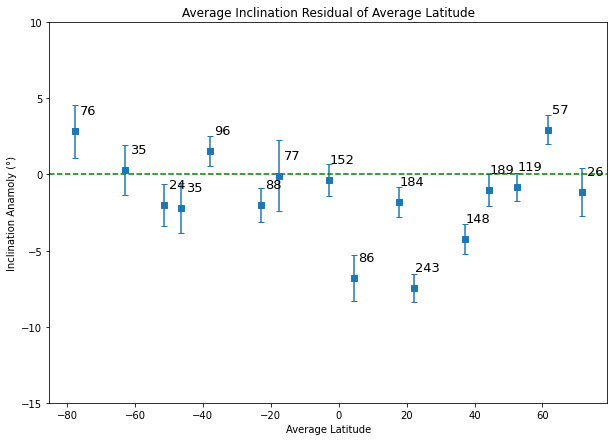

In [107]:
plt.figure(figsize=(10, 7))

plt.xlabel('Average Latitude')
plt.ylabel('Inclination Anamoly (°)') 
plt.title('Average Inclination Residual of Average Latitude')

xs = df_groups["AvgLat"]
ys = df_groups["new_ΔI"]
ls = pd.to_numeric(pd.Series(df_groups["GroupAmount"]))

plt.plot(xs, ys, '.r')

#zip joins x and y coordinates in pairs
for label, x, y in zip(ls, xs, ys):
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(13,17), ha = 'center', fontsize=13)

#plt.plot(df_groups.AvgLat, df_groups["new_ΔI"], 'r^')

# curve fit
z = np.polyfit(xs, ys, 5)
zpoly = np.poly1d(z)
#plt.plot(xs, zpoly(xs), c = '0.85')  

plt.errorbar(xs, ys, yerr = np.abs(df_groups['ΔIstdv_weighted']), fmt = 's', capsize=3)
plt.axhline(y=0, color='g', linestyle='--');
plt.ylim([-15, 10]);